In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [2]:
#Loading the Data to Pandas DataFrame

glass_data = pd.read_csv('D://Data Trained//Internship//Projects//Project Details//3rd_Practice phase//Glass Identification.csv', header=None)
glass_data.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
#Providing title to the Attributes(Column titles)

column_title = ['ID No', 'Refractive Index', 'Sodium', 'Magnesium', 'Aluminium', 'Silicon', 'Potassium', 'Calsium', 'Barium', 'Iron', 'Type of Glass']
glass_data.columns = column_title
glass_data.head()

,ID No,Refractive Index,Sodium,Magnesium,Aluminium,Silicon,Potassium,Calsium,Barium,Iron,Type of Glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
#Rows and Columns details of the dataset

glass_data.shape

(214, 11)

In [9]:
#checking if any missing values/null values in the dataset

glass_data.isnull().sum()

ID No               0
Refractive Index    0
Sodium              0
Magnesium           0
Aluminium           0
Silicon             0
Potassium           0
Calsium             0
Barium              0
Iron                0
Type of Glass       0
dtype: int64

In [10]:
#checking if any duplicate values in the dataset

glass_data.duplicated().sum()

0

In [11]:
#checking no. of unique values in all the attributes

glass_data.nunique()

ID No               214
Refractive Index    178
Sodium              142
Magnesium            94
Aluminium           118
Silicon             133
Potassium            65
Calsium             143
Barium               34
Iron                 32
Type of Glass         6
dtype: int64

In [12]:
#general information of the dataset

glass_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID No             214 non-null    int64  
 1   Refractive Index  214 non-null    float64
 2   Sodium            214 non-null    float64
 3   Magnesium         214 non-null    float64
 4   Aluminium         214 non-null    float64
 5   Silicon           214 non-null    float64
 6   Potassium         214 non-null    float64
 7   Calsium           214 non-null    float64
 8   Barium            214 non-null    float64
 9   Iron              214 non-null    float64
 10  Type of Glass     214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [13]:
#Statistical details of the dataset

glass_data.describe()

,ID No,Refractive Index,Sodium,Magnesium,Aluminium,Silicon,Potassium,Calsium,Barium,Iron,Type of Glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


C:\Users\praje\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


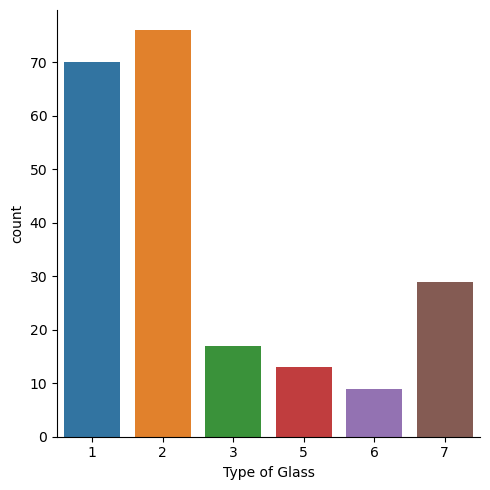

In [14]:
#no. of total data distribution amongst each unique quality of Glass

sns.catplot(data=glass_data, x = 'Type of Glass', kind = 'count')

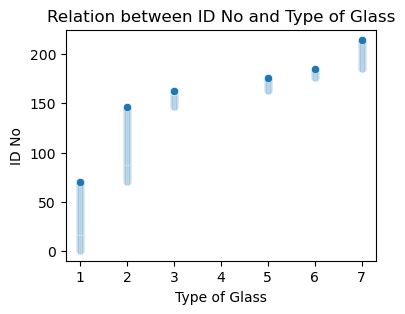

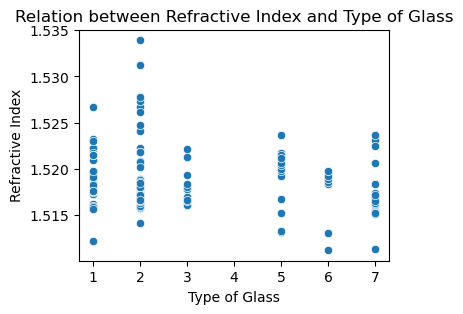

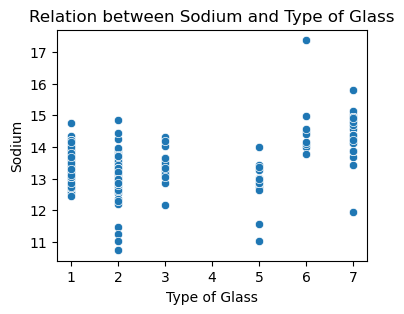

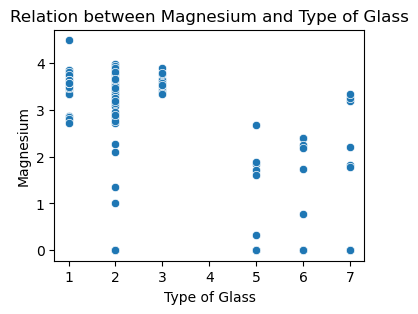

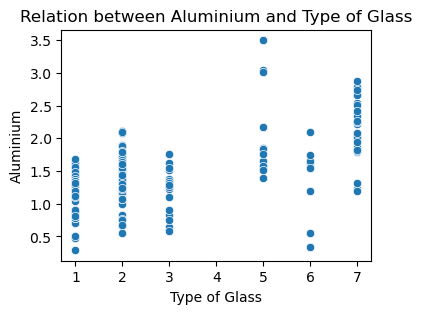

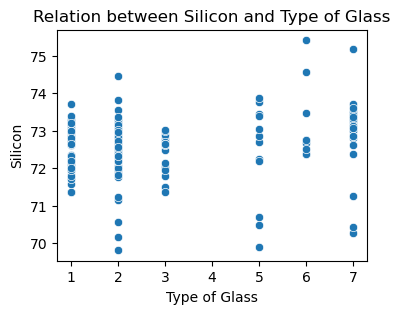

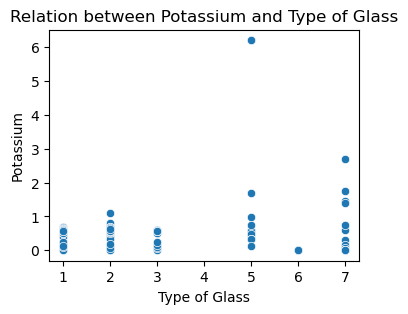

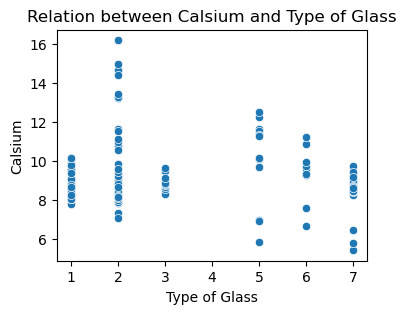

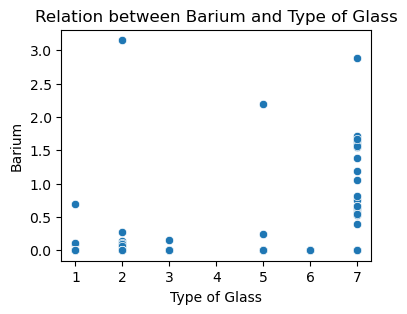

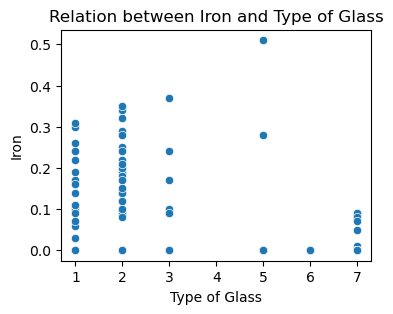

In [15]:
#Visualizing relation of each Attribute to the Types of Glass

glass_attributes = glass_data.columns.drop('Type of Glass')

for attribute in glass_attributes:
    plt.figure(figsize=(4,3))
    sns.scatterplot(x=glass_data['Type of Glass'], y=glass_data[attribute])
    plt.title(f'Relation between {attribute} and Type of Glass')
    plt.show()

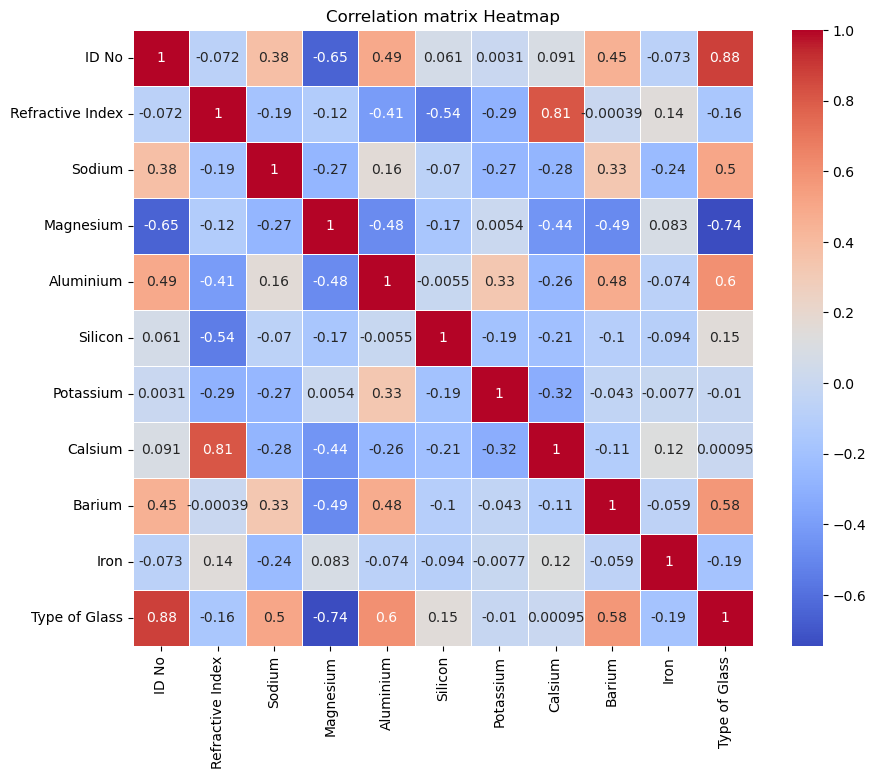

Type of Glass       1.000000
ID No               0.877357
Aluminium           0.598829
Barium              0.575161
Sodium              0.502898
Silicon             0.151565
Calsium             0.000952
Potassium          -0.010054
Refractive Index   -0.164237
Iron               -0.188278
Magnesium          -0.744993
Name: Type of Glass, dtype: float64


In [16]:
#Visualizing by Heatmap to understand the correlation between all the effective columns of the dataset

data_corr = glass_data.corr() #dropping the non effective columns from the dataset
plt.figure(figsize=(10,8))
sns.heatmap(data_corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation matrix Heatmap')
plt.show()

print(data_corr['Type of Glass'].sort_values(ascending=False)) #to print the correlation of target/labeled column with other columns 

In [18]:
#Data Preprocessing to prepare for the machine learning model

x_para = glass_data.drop(columns=['Type of Glass'], axis=1)
y_para = glass_data['Type of Glass'].apply(lambda y_no:1 if y_no <=4 else 0) #Binarization on Type of Glass as we have to predict only Window or Non-window type Glass

In [19]:
#Splitting the preprocessed data into train and test data with target datas

x_train, x_test, y_train, y_test = train_test_split(x_para, y_para, test_size=0.2, random_state=6)

In [20]:
print(x_para.shape, x_train.shape, x_test.shape)

(214, 10) (171, 10) (43, 10)


In [21]:
x_train.head()

,ID No,Refractive Index,Sodium,Magnesium,Aluminium,Silicon,Potassium,Calsium,Barium,Iron
94,95,1.51629,12.71,3.33,1.49,73.28,0.67,8.24,0.00,0.00
18,19,1.51911,13.90,3.73,1.18,72.12,0.06,8.89,0.00,0.00
52,53,1.51808,13.43,2.87,1.19,72.84,0.55,9.03,0.00,0.00
38,39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.00,0.00
195,196,1.51545,14.14,0.00,2.68,73.39,0.08,9.07,0.61,0.05


In [22]:
#Hyperparameter tuning for optimizing and Loading the data into model for model training

#here using RandomForestClassifier and GridSearchCV to predict with the best combinations of parameters

parameters_list = {
    'n_estimators': [50,100,200],        #providing the list of parameters for numbers of trees in the model
    'max_depth': [None, 10,20],       #providing list of parameters for maximum depth of each tress
    'min_samples_split': [2,5,10],        #providing the list of parameters for minimum number of samples to split an internal node
    'min_samples_leaf': [1,4,6]           #providing the list of parameters for minimum number of samples in a leaf node
            }

model = RandomForestClassifier()

gridsearch_model = GridSearchCV(estimator=model, param_grid=parameters_list, cv=5)

gridsearch_model.fit(x_train, y_train)

ml_model = gridsearch_model.best_estimator_


In [23]:
#Model evaluation & Accuracy score

x_train_pred = ml_model.predict(x_train)
train_accuracy = accuracy_score(x_train_pred, y_train)
print(f'The accuracy score for training data is: {train_accuracy*100} %')

y_test_pred = ml_model.predict(x_test)

test_accuracy = accuracy_score(y_test_pred, y_test)

print(f'The accuracy for testing data is: {test_accuracy*100} %')

The accuracy score for training data is: 100.0 %
The accuracy for testing data is: 100.0 %


In [25]:
#Prediction system for any one of the row from given data

glass_info = x_para.iloc[int(input('Select Row-index from the data: '))].to_numpy() #selecting user input for row-index to do a prediction
reshape_glass_info = glass_info.reshape(1,-1) #reshaping the data as 2D array from 1D

prediction_system = ml_model.predict(reshape_glass_info)
prediction_confidence = ml_model.predict_proba(reshape_glass_info) #generating prediction probability with reference to a considered model

if prediction_system[0]==1:
    print('This glass is the Window type Glass')
    print(f'The confidence for the Window type Glass prediction is {int(prediction_confidence[0][1]*100)} %')
else:
    print('This glass is Non-window type Glass')
    print(f'The confidence for Non-window type Glass prediction is {int(prediction_confidence[0][0]*100)} %')

Select Row-index from the data: 109
This glass is the Window type Glass
The confidence for the Window type Glass prediction is 93 %


C:\Users\praje\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\praje\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [26]:
#CONCLUSION:

#Here I generated the Accuracy of the Testing data as almost 1, hence the suitability of the model can be said as very much well for the given data.

#The prediction system is giving confidence percentage for the determined prediction, which will ensure how much the prediction is reliable to believe or accept.